# Regresión lineal simple

## El paquete statsmodel para la regresión lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style("white")

In [2]:
data = pd.read_csv("/home/israel/Documentos/Machine-learning/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# La variable predictora es Ventas (la primera)

lm = smf.ols(formula = "Sales~TV", data = data).fit()

In [5]:
lm

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

$$S  = 0.047537TV+7.032594 $$

In [7]:
# Coef. de determinación

lm.rsquared

0.611875050850071

In [8]:
# Existe una variante ajustada

lm.rsquared_adj

0.6099148238341623

Si queremos un resumen general, podemos pedirlo

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        00:10:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
sales_pred = lm.predict(data["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

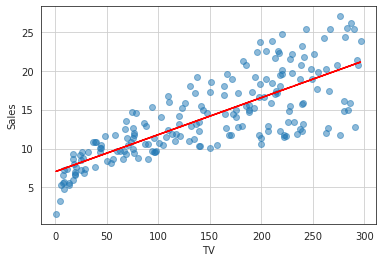

In [11]:
plt.scatter(data["TV"], data["Sales"], alpha = 0.5)
plt.plot(data["TV"], sales_pred, c="red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.grid()

plt.show()

In [12]:
data["Sales_pred"] = 0.047537*data["TV"] + 7.032594

In [13]:
data.head()

,TV,Radio,Newspaper,Sales,Sales_pred
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284


In [14]:
data["RSE"] = (data["Sales"]-data["Sales_pred"])**2
SSE = sum(data["RSE"])
RSE = np.sqrt(SSE/len(data)-2) # Residual Standar error

In [15]:
sales_m = np.mean(data["Sales"])

In [16]:
error = RSE/sales_m
error

0.20806882497900991

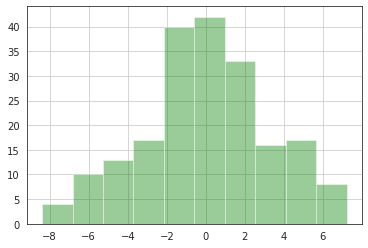

In [17]:
plt.hist(data["Sales"]-data["Sales_pred"], color = "green", alpha = 0.4)
plt.grid()
plt.show()

## Regresión lineal multiple 

### El paquete statsmodel para la regresión lineal múltiple

In [18]:
# Agreguemos Newspaper al modelo existente

lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [19]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [20]:
lm2.rsquared

0.6458354938293271

In [21]:
lm2.rsquared_adj

0.6422399150864777

In [22]:
#Valores predichos por el modelo de regresión
sales_pred = lm2.predict(data[["TV","Newspaper"]])

In [23]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [24]:
SSE = sum((data["Sales"]-sales_pred)**2)
SSE

1918.561811896827

In [25]:
RSE = np.sqrt(SSE/(len(data)-2-1))
RSE

3.120719860252885

In [26]:
error = RSE/sales_m

In [27]:
error

0.22255089037282116

Resumen global

In [28]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.95e-45
Time:                        00:10:57   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De momento añadir el periodico no nos aporta mucho

In [29]:
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [30]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [31]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.83e-98
Time:                        00:10:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sales_pred = lm3.predict(data[["TV","Radio"]])

In [33]:
SSE = sum((data["Sales"]-sales_pred)**2)
SSE

556.9139800676182

In [34]:
RSE = np.sqrt(SSE/(len(data)-2-1))
RSE

1.681360912508001

In [35]:
error = RSE/sales_m

In [36]:
error

0.11990450436855059

vamos a contruir un ultimo modelo con TV,Radio y Newspaper

In [37]:
lm4 = smf.ols(formula = "Sales~TV+Radio+Newspaper", data =data).fit()

In [38]:
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [39]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        00:10:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
sales_pred = lm4.predict(data[["TV","Radio","Newspaper"]])

In [41]:
SSE = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSE/(len(data)-3-1))
error = RSE/sales_m

In [42]:
error 

0.12020041885646242

## Multicolinealidad
#### El Factor de inflación de la varianza

* VIF = 1 : las variables no estan correlacionadas
* VIF < 5: Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [43]:
# Newspaper ~ TV+Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula = 'Newspaper~TV+Radio',data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [44]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula = 'TV~Newspaper+Radio',data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [45]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)

lm_r = smf.ols(formula = 'Radio~TV+Newspaper',data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

Finalmente nos quedamos con el modelo lm3.

In [46]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.83e-98
Time:                        00:11:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Validación del modelo
## Dividir el dataset en conjunto de entrenamiento y de testing

In [47]:
a = np.random.randn(len(data))

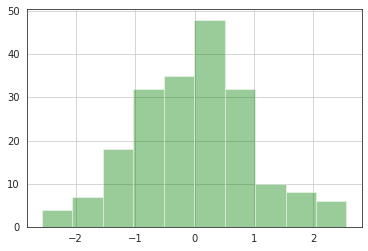

In [48]:
plt.hist(a, color = "green", alpha = 0.4)
plt.grid()
plt.show()

In [49]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [50]:
len(training), len(testing)

(166, 34)

In [51]:
lm5 = smf.ols(formula = "Sales ~ TV+Radio", data = training).fit()

In [52]:
sales_pred = lm5.predict(testing)

In [53]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     725.8
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           6.88e-82
Time:                        00:11:01   Log-Likelihood:                -319.01
No. Observations:                 166   AIC:                             644.0
Df Residuals:                     163   BIC:                             653.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9623      0.326      9.086      0.000       2.319       3.606
TV             0.0454      0.002     29.849      0.000       0.042       0.048
Radio          0.1904      0.009     21.948      0.000       0.173       0.207
==============================================================================
Omnibus:                       64.857   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.771
Skew:                          -1.536   Prob(JB):                     6.27e-47
Kurtosis:                       7.618   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Validación del modelo con el conjunto de testing**

In [54]:
sales_pred = lm5.predict(testing)
sales_pred

7      12.155242
8       3.752832
9      12.536427
19     14.205215
27     17.051664
28     19.426651
39     20.499184
40     16.409026
45     15.201998
48     16.294153
59     18.152171
78      8.899166
111    21.178838
125     9.170937
127     6.606709
129     7.954821
132     8.521544
135    14.103603
138     9.846365
141    18.502733
143     8.800481
144    10.150962
146    15.262368
151    10.059668
155     5.356676
157    10.016895
158    10.517902
167    13.349429
171    14.415757
178    15.973775
179    12.390921
182     6.601111
190    12.580649
198    23.844240
dtype: float64

In [55]:
SSE =sum((testing["Sales"]-sales_pred)**2)
SSE

104.00241407743091

In [56]:
RSE = np.sqrt(SSE/(len(testing)-2-1))
RSE

1.8316431374978404

In [57]:
sales_mean = np.mean(testing["Sales"])
error  = RSE/sales_mean
error

0.14489498993700925

El modelo funciona bien, la evaluación nos entregó un 10% de error.

**RESUMEN**

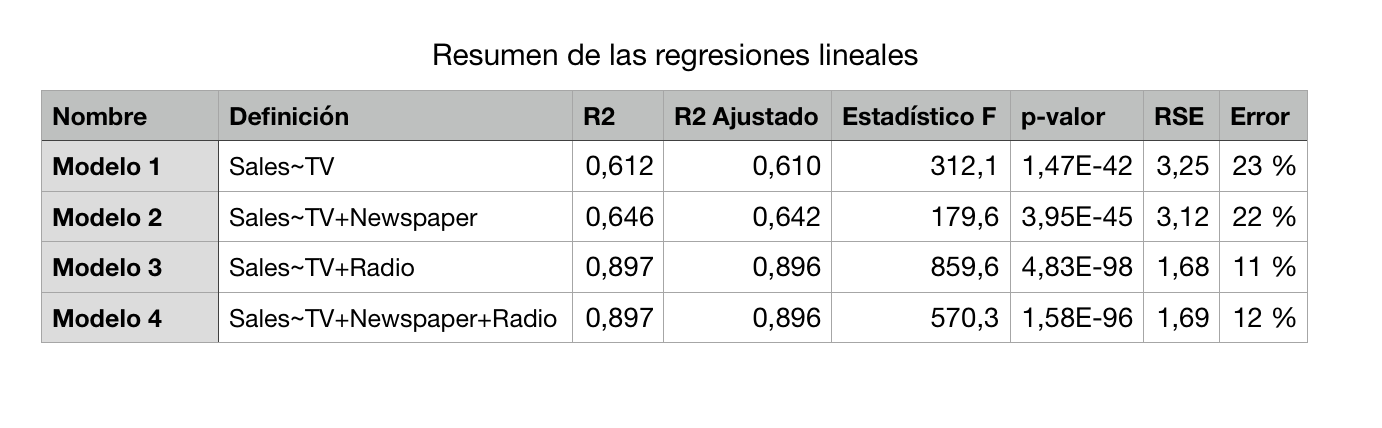

In [58]:
from IPython.display import Image
Image(filename = "/home/israel/Documentos/Machine-learning/python-ml-course/resources/summary-lm.png")

# El paquete scikit-learn para la regresión lineal y la selección de rasgos

In [59]:
from sklearn.feature_selection import RFE # recursive feature elimanation
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [60]:
feature_cols = ["TV","Radio","Newspaper"]
X = data[feature_cols] #variables predictoras
Y =data["Sales"]

In [61]:
estimator = SVR(kernel = "linear")
selector = RFE(estimator,2,step = 1) #(modelo,n° variables modelo ,n°de pasos)
selector = selector.fit(X,Y)

In [62]:
#Para ver las variables seleccionadas
selector.support_

array([ True,  True, False])

In [63]:
X_pred = X[["TV","Radio"]]

In [64]:
lm = LinearRegression()
lm.fit(X_pred,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.intercept_

2.9210999124051362

In [66]:
lm.coef_

array([0.04575482, 0.18799423])

In [67]:
lm.score(X_pred,Y) # R^2 ajustado

0.8971942610828956

# El tratamiento de las variables categóricas

In [68]:
df = pd.read_csv("/home/israel/Documentos/Machine-learning/python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [69]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [70]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [71]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [72]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [73]:
df_new = df.join([dummy_gender,dummy_city_tier])

In [74]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [75]:
feature_cols = ['Monthly Income','Transaction Time','Gender_Female', 'Gender_Male','City_Tier 1','City_Tier 2','City_Tier 3',
               'Record'] # Predictores

In [76]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [77]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


seamos mas ordenados

In [79]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [80]:
lm.score(X,Y)

0.9179923586131016

In [81]:
df_new["Prediction"] = lm.predict(X)

In [82]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [83]:
SSE = np.sum((df_new["Total Spend"]-df_new["Prediction"])**2)
SSE

1517733985.3408163

In [84]:
RSE = np.sqrt(SSE/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [85]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [86]:
error = RSE/sales_mean
error

0.13031135680294162

## Eliminar variables dummy redundantes

In [87]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]
dummy_gender

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [88]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = 'City').iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [89]:
df_new = df.join([dummy_gender,dummy_city_tier])
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [90]:
feature_cols = ['Monthly Income','Transaction Time','Gender_Male','City_Tier 2','City_Tier 3','Record']
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [92]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

## Transformación de variables para conseguir una relación no lineal

Para esta sección trabajaremos con un dataset que contiene información de consumo de un conjunto de autos de los años 70.

In [93]:
data_auto = pd.read_csv("/home/israel/Documentos/Machine-learning/python-ml-course/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [94]:
sum(pd.isnull(data_auto["mpg"])) # hay 8 NaN

8

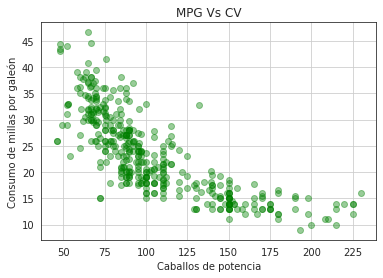

In [95]:
plt.scatter(data_auto['horsepower'],data_auto['mpg'],color ="green", alpha = 0.4)
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo de millas por galeón')
plt.grid()
plt.title('MPG Vs CV')
plt.show()

### Modelo de regresión lineal

In [96]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = X[:,np.newaxis]

In [97]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
mpg_pred = lm.predict(X_data)

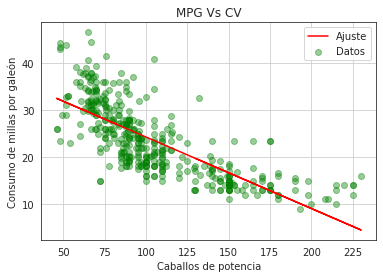

In [99]:
plt.figure()
plt.scatter(X,Y, color = "green", alpha = 0.4, label = "Datos")
plt.plot(X_data,mpg_pred, color = "red", label = "Ajuste")
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo de millas por galeón')
plt.grid()
plt.title('MPG Vs CV')
plt.legend()
plt.show()

In [100]:
SSE = np.sum((Y-mpg_pred)**2)
RSE = np.sqrt(SSE/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSE,RSE,y_mean,error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadratico

In [101]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [102]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
lm.score(X_data,Y)

0.4849887034823205

In [104]:
mpg_pred2 = lm.predict(X_data)

In [105]:
SSE = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSE/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSE, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión lineal y cuadrático

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [107]:
poly = PolynomialFeatures(degree = 2)
X_data = poly.fit_transform(X[:, np.newaxis])

In [108]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lm.score(X_data,Y)

0.6439066584257469

In [110]:
lm.intercept_

55.02619244708036

In [111]:
lm.coef_ # ver el comentario sobre el primer elemento, el cero

array([ 0.        , -0.43404318,  0.00112615])

Podemos buscar el mejor ajuste polinomial, antes de esodefinamos una función de utilidad

In [112]:
def regresion_validation(X_data, Y, Y_pred):
    SSE = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSE/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSE)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [113]:
for d in range(2,11):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print("Regresión de grado"+str(d))
    print("R2: "+str(lm.score(X_data,Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data,Y,lm.predict(X_data))

Regresión de grado2
R2: 0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
Regresión de grado3
R2: 0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
Regresión de grado4
R2: 0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
Regresión de grado5
R2: 0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD: 8373.171393636556, RSE: 4.546921735442387, Y_mean: 23.51457286432162, error: 19.336612073193884%
Regresión de grado6
R2: 0.6572844624926477
-157.07318244319492

# El problema de los outliers

Text(300, 45, 'outlier')

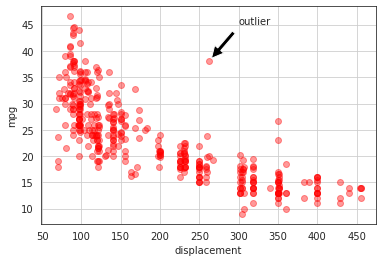

In [140]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro", alpha = 0.4)
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.grid()

plt.annotate("outlier", xy=(262,38), xytext = (300,45),
            arrowprops = dict(facecolor = "black", shrink = 0.09))

In [115]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
lm.score(X,Y)

0.6261049762826918

Text(300, 45, 'Outlier')

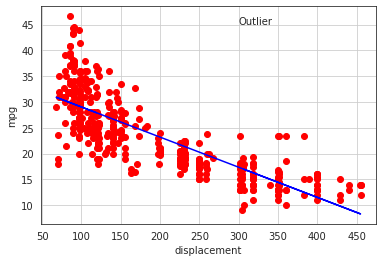

In [124]:
plt.scatter(X,Y, color ="red")
plt.plot(X,lm.predict(X), color = "blue")
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.grid()

In [118]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [119]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [120]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [121]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm2 = LinearRegression()
lm2.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
lm2.score(X,Y)

0.6466514317531822

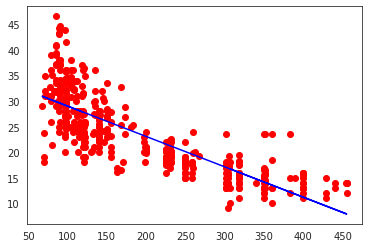

In [123]:
plt.plot(X,Y,"ro")
plt.plot(X, lm2.predict(X), color  = "blue")